#### Status of LA's Vision Zero

To understand the state of car accident data in Los Angeles, we will be examining the Statewide Integrated Traffic Records System (SWITRS) database, maintained by the California Highway Patrol. This data is from 2019, and provides accident rates per city in Los Angeles County. For the purposes of this exercise, we have filtered out the category "Los Angeles" and are looking for the cities that have the highest traffic incident rates. Then we can see if this data aligns with the most dangerous intersections as identified by Vision Zero. 

This notebook will refine the data based on midterm feedback, and add missing elements to the charts.

In [1]:
# import the necessary data libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np

Next, we import the data from SWITRS

In [2]:
df = pd.read_csv('data/SWITRS_Accidents.csv')

#### Preliminary Inspection
A quick look at the size of the data

In [6]:
df.shape

(26, 8)

In [5]:
df.head()

,City,Total Fatal Crashes,Total Injury Crashes,Total PDO Crashes,Pedestrian Involved Fatal,Pedestrian Involved Injury,Bicyclist Involved Fatal,Bicyclist Involved Injury
0,Baldwin Park,5,405,844,2,20,2,16
1,Beverly Hills,1,469,23,0,40,0,31
2,Carson,6,396,1147,3,21,0,11
3,Compton,14,366,1014,4,39,4,22
4,Diamond Bar,2,432,1299,1,3,0,3


#### Compariing types of crash data
Since I have multiple categories of data that I want to compare, I will create a grouped bar chart. By not specifying Y, pandas takes all other columns besides X for the chart.

<AxesSubplot: title={'center': 'City of LA Traffic Incidents by Type'}, xlabel='City'>

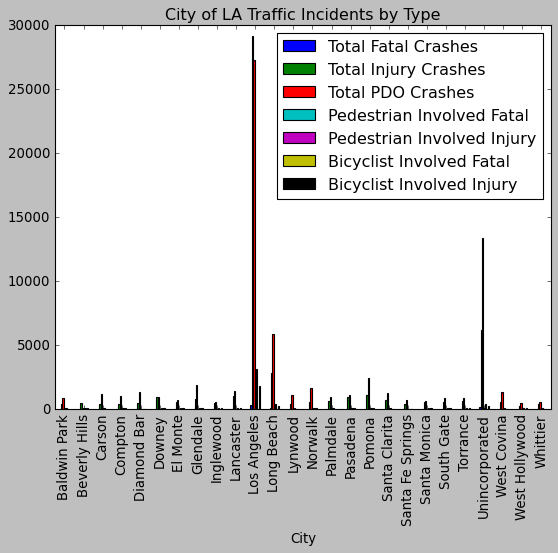

In [8]:
# make a bar graph of traffic fatalities and injuries
df.head(26).plot.bar(x='City',
                     title='City of LA Traffic Incidents by Type')

That's great, but we should sort it by top 10 cities with the highest incident rates for vehicle-related deaths and injuries.

In [12]:
# First, we'll make a chart of the top 10 cities iwth the hightest rates of pedestrian fatalities
df_sorted = df.sort_values(by='Pedestrian Involved Fatal', ascending = False)

In [13]:
df_sorted[['City','Pedestrian Involved Fatal']].head(10)

,City,Pedestrian Involved Fatal
10,Los Angeles,141
22,Unincorporated,32
11,Long Beach,17
16,Pomona,6
9,Lancaster,5
14,Palmdale,5
3,Compton,4
21,Torrance,4
25,Whittier,3
2,Carson,3


<AxesSubplot: title={'center': 'Cities with Highest Pedestrian Death Rates'}, xlabel='City', ylabel='Number of Persons'>

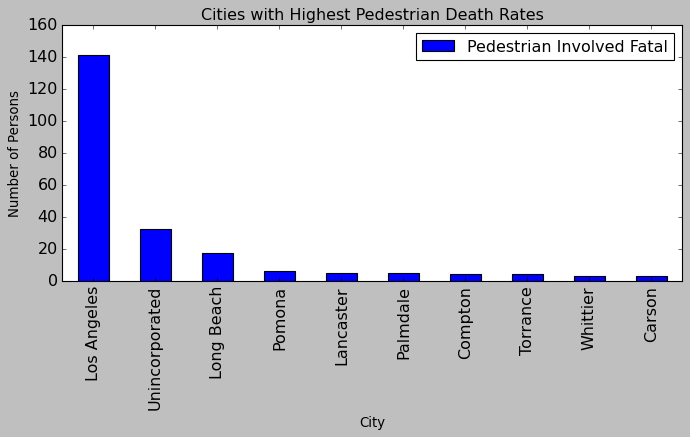

In [36]:
# plot it as a grouped bar chart
df_sorted.head(10).plot.bar(x='City',
                            y='Pedestrian Involved Fatal',
                            title='Cities with Highest Pedestrian Death Rates',
                            figsize=(10,4),
                            xlabel='City',
                            ylabel='Number of Persons',
                            fontsize='large')

Let's add in the other accident types.

<AxesSubplot: xlabel='City'>

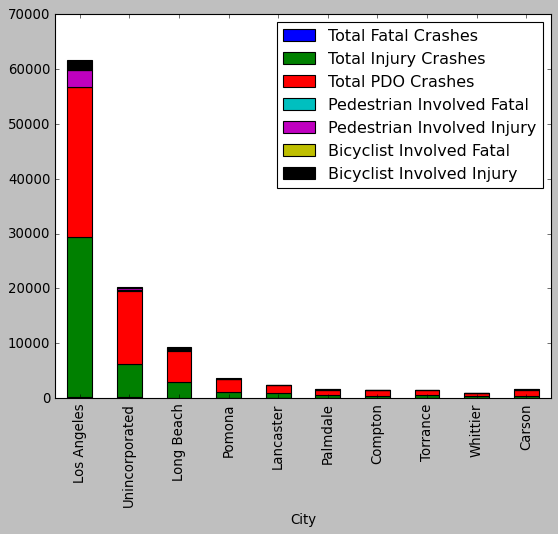

In [25]:
# make a stacked bar plot
df_sorted.head(10).plot.bar(x='City',stacked=True)